# Code for the customer churn project, part of the portfolio at https://zohaibdr.github.io/



In [24]:
#Import usual libraries 

import numpy as np # Multi-dimensional array object
import pandas as pd # Data Manipulation
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization

import plotly.express as px # Interactive Data Visualization
import plotly.graph_objects as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Offline version of the Plotly modules.
# ! pip install cufflinks
import cufflinks as cf # Works as a connector between the pandas library and plotly
cf.go_offline() 
init_notebook_mode(connected=True) # To connect Jupyter notebook with JavaScript
from jupyterthemes import jtplot # Jupyter theme
jtplot.style(theme= 'grade3', context= 'notebook', ticks= True, grid= False)

# Import models to use 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.calibration import CalibratedClassifierCV 
from sklearn.svm import LinearSVC 
from sklearn.linear_model import LogisticRegression 

# Model evaluation 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score


# EXPLORATORY DATA ANALYSIS

In [25]:
# to load from url from google drive, the file should be 'Published' in from google sheets. Because there should be a host. 

DF= pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRJEFO_Fb2SfjD7a6r4Ear5Dw79ot_l-B28xQDwAW4SPzrdUEpivWBW5jrU0X47-T4zNq1l9alVP0GD/pub?gid=280565234&single=true&output=csv')

print(DF.shape)
# print(DF.columns)
DF.T


(5000, 21)


,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
state,16.00,35.00,31.00,35.00,36.00,1.00,19.00,24.00,18.00,49.00,...,28.00,3.00,26.00,49.00,27.00,11.00,49.00,7.00,7.00,46.00
account_length,128.00,107.00,137.00,84.00,75.00,118.00,121.00,147.00,117.00,141.00,...,140.00,97.00,83.00,73.00,75.00,50.00,152.00,61.00,109.00,86.00
area_code,415.00,415.00,415.00,408.00,415.00,510.00,510.00,415.00,408.00,415.00,...,510.00,510.00,415.00,408.00,408.00,408.00,415.00,415.00,510.00,415.00
phone_number,2845.00,2301.00,1616.00,2510.00,155.00,3355.00,1516.00,116.00,425.00,163.00,...,1949.00,4367.00,1476.00,4467.00,4726.00,2000.00,394.00,313.00,3471.00,2412.00
international_plan,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
voice_mail_plan,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
number_vmail_messages,25.00,26.00,0.00,0.00,0.00,0.00,24.00,0.00,0.00,37.00,...,0.00,0.00,0.00,0.00,0.00,40.00,0.00,0.00,0.00,34.00
total_day_minutes,265.10,161.60,243.40,299.40,166.70,223.40,218.20,157.00,184.50,258.60,...,244.70,252.60,188.30,177.90,170.70,235.70,184.20,140.60,188.80,129.40
total_day_calls,110.00,123.00,114.00,71.00,113.00,98.00,88.00,79.00,97.00,84.00,...,115.00,89.00,70.00,89.00,101.00,127.00,90.00,89.00,67.00,102.00
total_day_charge,45.07,27.47,41.38,50.90,28.34,37.98,37.09,26.69,31.37,43.96,...,41.60,42.94,32.01,30.24,29.02,40.07,31.31,23.90,32.10,22.00


In [26]:
# Also remove redundant columns 
df_cols = DF.columns 
cols_to_drop = ['phone_number', 'total_day_minutes','total_eve_minutes', 'total_night_minutes', 'total_intl_minutes']

for col in cols_to_drop :
    if col in df_cols:
        DF.drop(col, axis=1, inplace=True)
        print(f'Column {col} dropped from DataFrame.')
    else:
        print(f'Column {col} doesn\'t exist in DataFrame.')

print('Unique Area codes are: ', DF['area_code'].unique())

DF['area_code'].astype('category').dtypes
DF['state'].astype('category').dtypes

DF.describe() 

Column phone_number dropped from DataFrame.
Column total_day_minutes dropped from DataFrame.
Column total_eve_minutes dropped from DataFrame.
Column total_night_minutes dropped from DataFrame.
Column total_intl_minutes dropped from DataFrame.
Unique Area codes are:  [415 408 510]


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,class
count,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.99840,100.25860,436.911400,0.094600,0.264600,7.755200,100.029400,30.649668,100.191000,17.054322,99.919200,9.017732,4.435200,2.771196,1.570400,0.141400
std,14.80348,39.69456,42.209182,0.292691,0.441164,13.546393,19.831197,9.162069,19.826496,4.296843,19.958686,2.273763,2.456788,0.745514,1.306363,0.348469
min,0.00000,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.00000,73.00000,408.000000,0.000000,0.000000,0.000000,87.000000,24.430000,87.000000,14.140000,87.000000,7.510000,3.000000,2.300000,1.000000,0.000000
50%,26.00000,100.00000,415.000000,0.000000,0.000000,0.000000,100.000000,30.620000,100.000000,17.090000,100.000000,9.020000,4.000000,2.780000,1.000000,0.000000
75%,39.00000,127.00000,415.000000,0.000000,1.000000,17.000000,113.000000,36.750000,114.000000,19.900000,113.000000,10.560000,6.000000,3.240000,2.000000,0.000000
max,50.00000,243.00000,510.000000,1.000000,1.000000,52.000000,165.000000,59.760000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,9.000000,1.000000


## Class balance

In [27]:
#show class with people left and retained
DF['class'].value_counts() 

fig = go.Figure(data= [go.Pie(labels=['Retained (0)', 'Churned (1)'], values= DF['class'].value_counts())])
fig.show()


### Churn by Area code

   class  area_code  Freq
0      0        415  2149
1      0        408  1082
2      0        510  1062
3      1        415   346
4      1        510   184
5      1        408   177


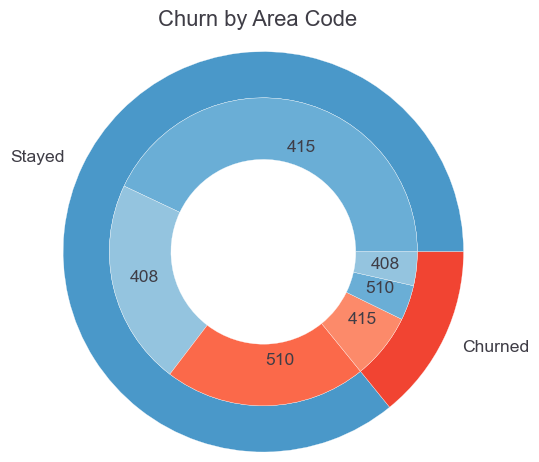

In [28]:
DF_by_area = DF.groupby('class')['area_code'].value_counts().to_frame().rename(columns={'area_code': 'Freq'}).reset_index().sort_values('class') 
print(DF_by_area)

group_names = DF['class'].value_counts().index
group_size = DF['class'].value_counts()
subgroup_names = DF_by_area['area_code']
subgroup_size = DF_by_area['Freq']

group_names1 = {'Stayed':group_names[0], 'Churned':group_names[1]}

# Create colors
a, b =[plt.cm.Blues, plt.cm.Reds]
 
# First Ring (outside)
fig, ax = plt.subplots(figsize = (5,5))
fig.suptitle('Churn by Area Code')
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names1, colors=[a(0.6), b(0.6)])
plt.setp( mypie, width=0.3, edgecolor='white')


# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), b(0.5), b(0.4)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()

Text(0.5, 1.0, 'Distribution of day charges by churn')

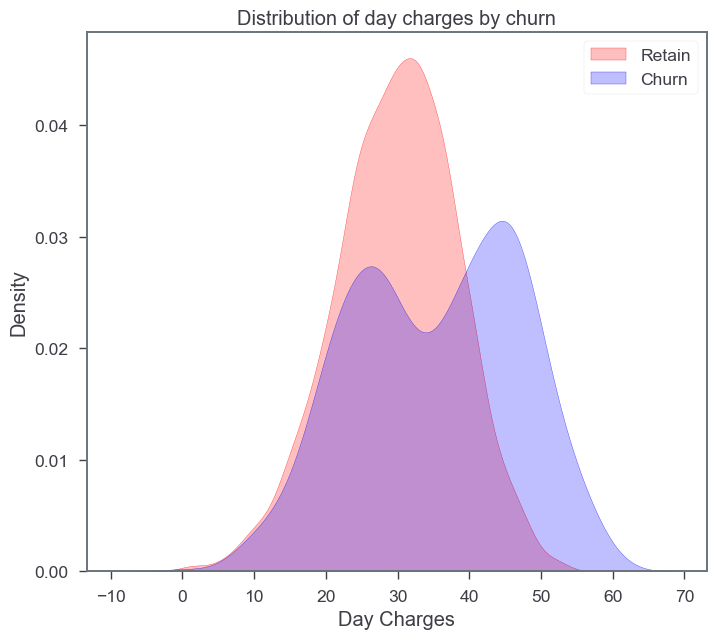

In [29]:
# Churn by day charges
ax = sns.kdeplot(DF.total_day_charge[(DF["class"] == 0)],
               color = "Red", fill = True)
ax = sns.kdeplot(DF.total_day_charge[(DF["class"] == 1)],
               color = "Blue", fill = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Day Charges")
ax.set_title("Distribution of day charges by churn")

Text(0.5, 1.0, 'Distribution of evening charges by churn')

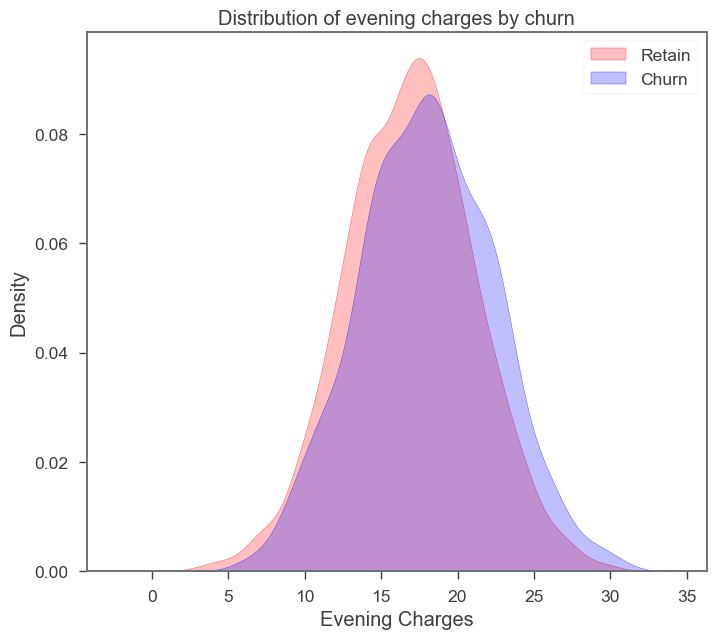

In [30]:
# Churn by evening charges
ax = sns.kdeplot(DF.total_eve_charge[(DF["class"] == 0)],
               color = "Red", fill = True)
ax = sns.kdeplot(DF.total_eve_charge[(DF["class"] == 1)],
               color = "Blue", fill = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Evening Charges")
ax.set_title("Distribution of evening charges by churn")

In [31]:
# Identify feature and prepare data before Model Training
X = DF.drop(["class", "area_code"], axis="columns")
y = DF["class"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10, stratify=y)


# 1. Random Forest 

In [32]:
model_RF = RandomForestClassifier(class_weight="balanced", random_state=10)
model_RF.fit(X_train, y_train.values.ravel()) 
y_predict = model_RF.predict(X_test)


# Write custom function to evaluate my classifiers


In [33]:

def evaluate_classifier(classifier, target, features):   
    """
    *** Calculates accuracy scores and prints the resutls. *** 
    classifier: model to evaluate
    features: independent variables
    target: dependent variable
    """
    y_predict = classifier.predict(features)
    print("Overall accuracy', %.3f" %accuracy_score(target, y_predict))
    # calculate prediction
    precision = precision_score(target, y_predict)

    print('Precision: %.3f' % precision)
    recall = recall_score(y_test, y_predict)
    print('Recall: %.3f' % recall)
    f1 = f1_score(y_test, y_predict)
    print('F1: %.3f' % f1)

    print('_____Confustion matrix__________ \n\n', confusion_matrix(y_test, y_predict))
    print('_____Classification report________ \n\n', classification_report(y_test, y_predict))



In [34]:
evaluate_classifier(model_RF, y_test, X_test) 

Overall accuracy', 0.948
Precision: 0.972
Recall: 0.651
F1: 0.780
_____Confustion matrix__________ 

 [[1284    4]
 [  74  138]]
_____Classification report________ 

               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1288
           1       0.97      0.65      0.78       212

    accuracy                           0.95      1500
   macro avg       0.96      0.82      0.88      1500
weighted avg       0.95      0.95      0.94      1500



# 2. Logistic Regression


In [35]:
model_LR = LogisticRegression(solver='liblinear',random_state=10, class_weight="balanced")
model_LR.fit(X_train, y_train)
# call custom function 
evaluate_classifier(model_LR, y_test, X_test)


Overall accuracy', 0.775
Precision: 0.356
Recall: 0.731
F1: 0.479
_____Confustion matrix__________ 

 [[1008  280]
 [  57  155]]
_____Classification report________ 

               precision    recall  f1-score   support

           0       0.95      0.78      0.86      1288
           1       0.36      0.73      0.48       212

    accuracy                           0.78      1500
   macro avg       0.65      0.76      0.67      1500
weighted avg       0.86      0.78      0.80      1500



# 3. SUPPORT VECTOR MACHINE CLASSIFIER


In [36]:
model_svm = CalibratedClassifierCV()
model_svm.fit(X_train, y_train)    
evaluate_classifier(model_svm, y_test, X_test)


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Overall accuracy', 0.866
Precision: 0.641
Recall: 0.118
F1: 0.199
_____Confustion matrix__________ 

 [[1274   14]
 [ 187   25]]
_____Classification report________ 

               precision    recall  f1-score   support

           0       0.87      0.99      0.93      1288
           1       0.64      0.12      0.20       212

    accuracy                           0.87      1500
   macro avg       0.76      0.55      0.56      1500
weighted avg       0.84      0.87      0.82      1500



# 4. K-NEAREST NEIGHBOUR (KNN)

In [37]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
evaluate_classifier(model_knn, y_test, X_test)


Overall accuracy', 0.859
Precision: 0.500
Recall: 0.085
F1: 0.145
_____Confustion matrix__________ 

 [[1270   18]
 [ 194   18]]
_____Classification report________ 

               precision    recall  f1-score   support

           0       0.87      0.99      0.92      1288
           1       0.50      0.08      0.15       212

    accuracy                           0.86      1500
   macro avg       0.68      0.54      0.53      1500
weighted avg       0.82      0.86      0.81      1500



# 5. NAIVE BAYES CLASSIFIER

In [38]:
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)
evaluate_classifier(model_gnb, y_test, X_test)


Overall accuracy', 0.859
Precision: 0.500
Recall: 0.382
F1: 0.433
_____Confustion matrix__________ 

 [[1207   81]
 [ 131   81]]
_____Classification report________ 

               precision    recall  f1-score   support

           0       0.90      0.94      0.92      1288
           1       0.50      0.38      0.43       212

    accuracy                           0.86      1500
   macro avg       0.70      0.66      0.68      1500
weighted avg       0.85      0.86      0.85      1500



# PLOT ROC CURVES FOR THE 5 MODELS AND FIND AUC SCORES

In [39]:
#Calcualte TPR and FPR 
fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:,1], pos_label = 1 )  
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_RF.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_knn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_gnb.predict_proba(X_test)[:, 1], pos_label = 1)


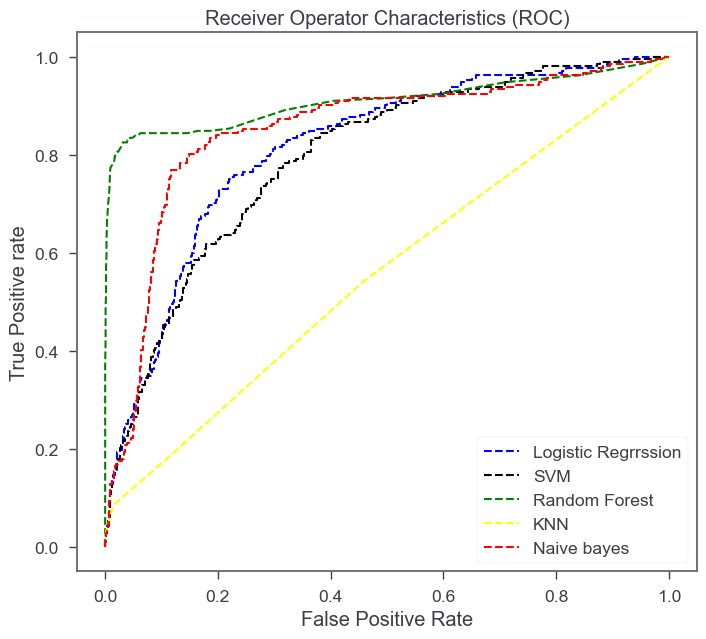

In [40]:
plt.plot(fpr1, tpr1, linestyle = '--', color ='blue', label = "Logistic Regrrssion")
plt.plot(fpr2, tpr2, linestyle = "--", color = "black", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "red", label = "Naive bayes")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
# plt.savefig('ROC', dpi = 600)
plt.show()

# AUC scores


In [41]:
auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_RF.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:, 1])

print("Logistic Regression:, %.3f" %auc_score1)         # Logistic Regression
print("Support Vector Machine, %.3f" %auc_score2)       # Support Vector Machine
print("Random Forest:, %.3f" %auc_score3)               # Random Forest
print("K-Nearest Neighbors:, %.3f" %auc_score4)         # K-Nearest Neighbors
print("Naive Bayes:, %.3f" %auc_score5)                 # Naive Bayes


Logistic Regression:, 0.814
Support Vector Machine, 0.795
Random Forest:, 0.910
K-Nearest Neighbors:, 0.557
Naive Bayes:, 0.850


# Precision-Recall graph

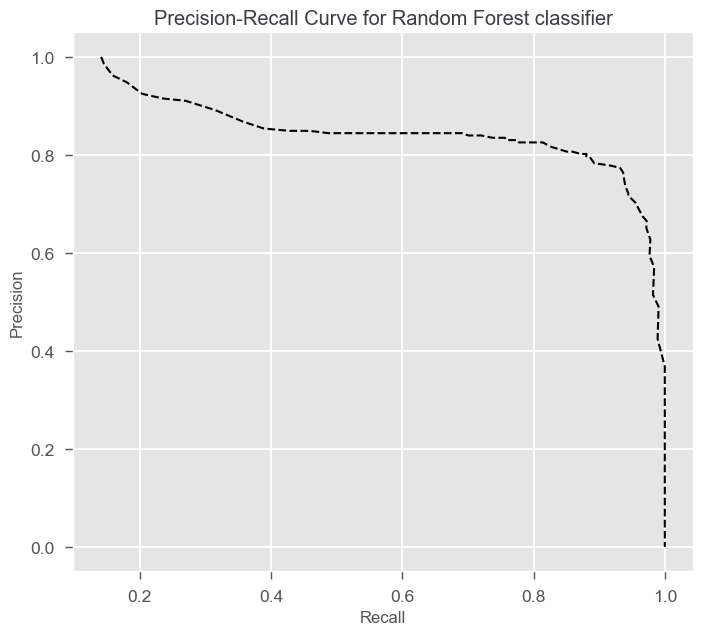

In [50]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, model_RF.predict_proba(X_test)[:, 1] )
plt.style.use('ggplot')

plt.plot(precision, recall, linestyle = "--", color = "black", label = "Random Forest")

plt.title('Precision-Recall Curve for Random Forest classifier')
plt.ylabel('Precision')
plt.xlabel('Recall')

# plt.legend(loc = 'best')

# plt.savefig('PrecRecCurve', dpi = 600)


### Changing default threshold of 0.5 to improve Recall score at the expense of Precision 



In [43]:

#from ChatGPT 
# Predict the probabilities of churn for each customer
y_prob = model_RF.predict_proba(X_test)[:, 1]

# Set the threshold for classifying a customer as a positive case
threshold = 0.5  # Default setting is 0.5
y_pred = (y_prob >= threshold).astype(int)

# Calculate the recall and precision at DEFAULT setting
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print('%0.3f' %recall)
print('%0.3f' %precision)

# Adjust the threshold to improve the recall 
desired_recall = 0.82   #looking at the precision-recall curve, this seems like a good point 
while recall < desired_recall:
    threshold -= 0.05
    y_pred = (y_prob >= threshold).astype(int)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
optim_threshold = threshold

print('At the threshold of %0.2f' %optim_threshold, ', the final recall is : %0.3f' %recall, 'while the precision is: %0.3f' %precision)


0.665
0.972
At the threshold of 0.30 , the final recall is : 0.821 while the precision is: 0.821


## Our best classifier Random Forest is further analyzed


### Feature importance

<AxesSubplot: >

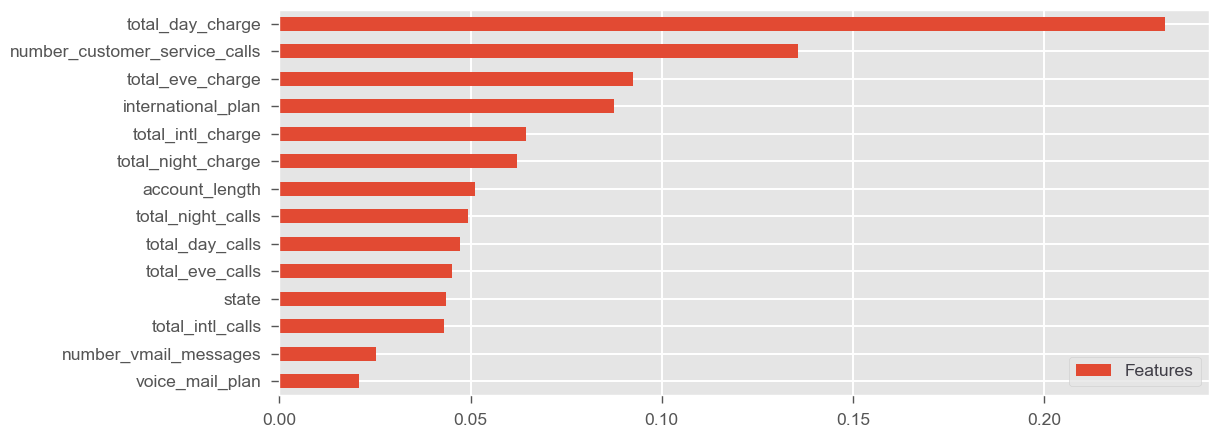

In [53]:
importance = model_RF.feature_importances_

# summarize feature importance
feat_scores = pd.DataFrame({"Features": model_RF.feature_importances_}, index = X.columns)
feat_scores = feat_scores.sort_values(by = "Features") 
feat_scores.plot(kind = "barh", figsize = (12,5))

# plt.savefig('FeatImp', dpi = 600)
